In [8]:
import warnings
warnings.simplefilter('ignore')

import datetime
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Load Dataset

In [2]:
data = pd.read_csv('/Users/kexinluo/Desktop/DS_take_home/11.user_referral_data/referral.csv', parse_dates=['date'])
data.head()

,user_id,date,country,money_spent,is_referral,device_id
0,2,2015-10-03,FR,65,0,EVDCJTZMVMJDG
1,3,2015-10-03,CA,54,0,WUBZFTVKXGQQX
2,6,2015-10-03,FR,35,0,CBAPCJRTFNUJG
3,7,2015-10-03,UK,73,0,PRGXJZAJKMXRH
4,7,2015-10-03,MX,35,0,PRGXJZAJKMXRH


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97341 entries, 0 to 97340
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      97341 non-null  int64         
 1   date         97341 non-null  datetime64[ns]
 2   country      97341 non-null  object        
 3   money_spent  97341 non-null  int64         
 4   is_referral  97341 non-null  int64         
 5   device_id    97341 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 4.5+ MB


In [6]:
print('Unique country:\t', len(data['country'].unique()))
print(f"Unique user id: {len(data['user_id'].unique())}")
print('Unique device:\t', len(data['device_id'].unique()))

Unique country:	 9
Unique user id: 18809
Unique device:	 17887


In [9]:
dt_referral_starts = datetime.datetime(2015,10,31)
(pd.Series(data.date.unique()) >= dt_referral_starts).value_counts()

False    28
True     28
dtype: int64

There are 28 days before the program, and 28 days after the program. User Referral program starts right in the middle

In [10]:
# extract day of week information
data['dayofweek'] = data['date'].apply(lambda x: x.dayofweek)
data.head()

,user_id,date,country,money_spent,is_referral,device_id,dayofweek
0,2,2015-10-03,FR,65,0,EVDCJTZMVMJDG,5
1,3,2015-10-03,CA,54,0,WUBZFTVKXGQQX,5
2,6,2015-10-03,FR,35,0,CBAPCJRTFNUJG,5
3,7,2015-10-03,UK,73,0,PRGXJZAJKMXRH,5
4,7,2015-10-03,MX,35,0,PRGXJZAJKMXRH,5


# Data Visualization

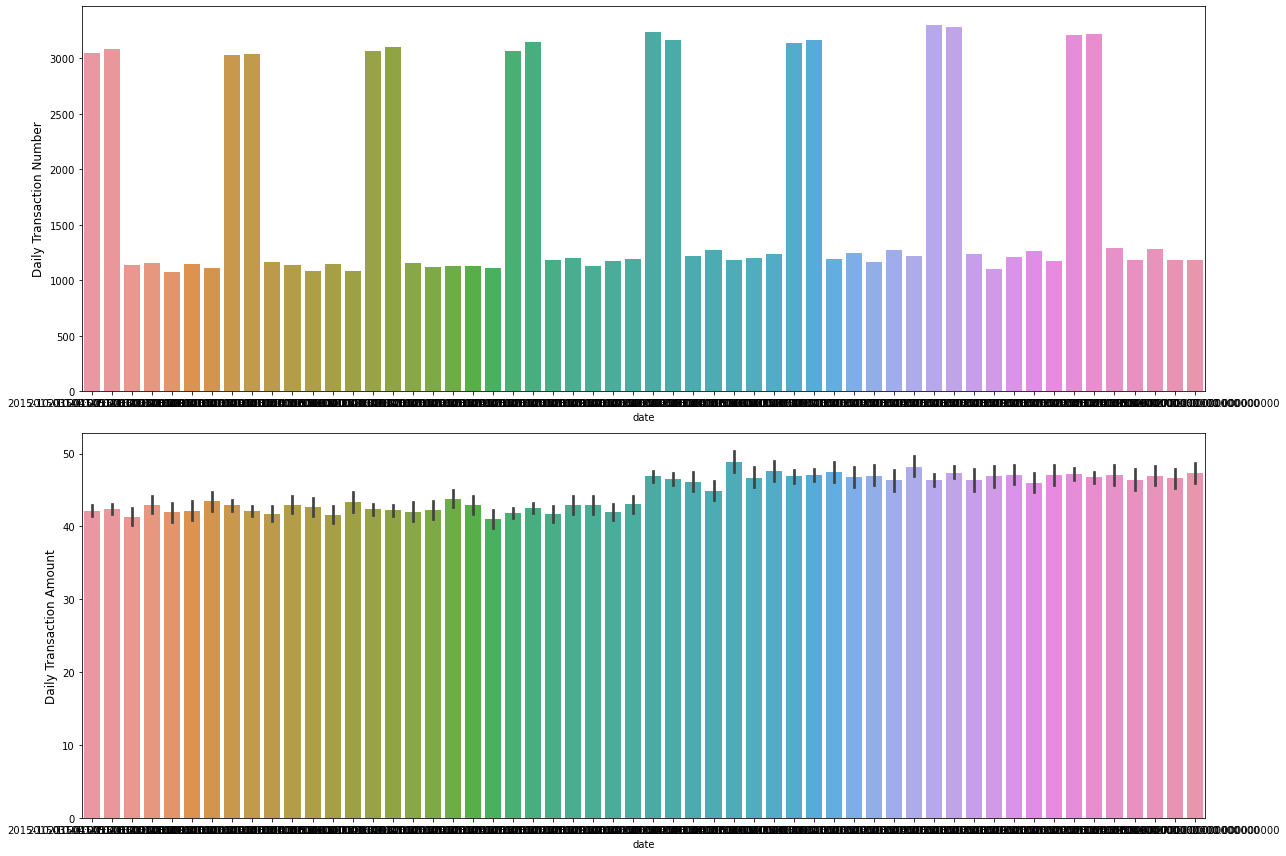

In [11]:
# daily money spent visualization
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 12))
sns.countplot(x='date', data=data, ax=ax[0])
ax[0].set_ylabel('Daily Transaction Number', fontsize=12)

sns.barplot(x='date', y='money_spent', data=data, ax=ax[1])
ax[1].set_ylabel('Daily Transaction Amount', fontsize=12)
plt.tight_layout()
plt.show()

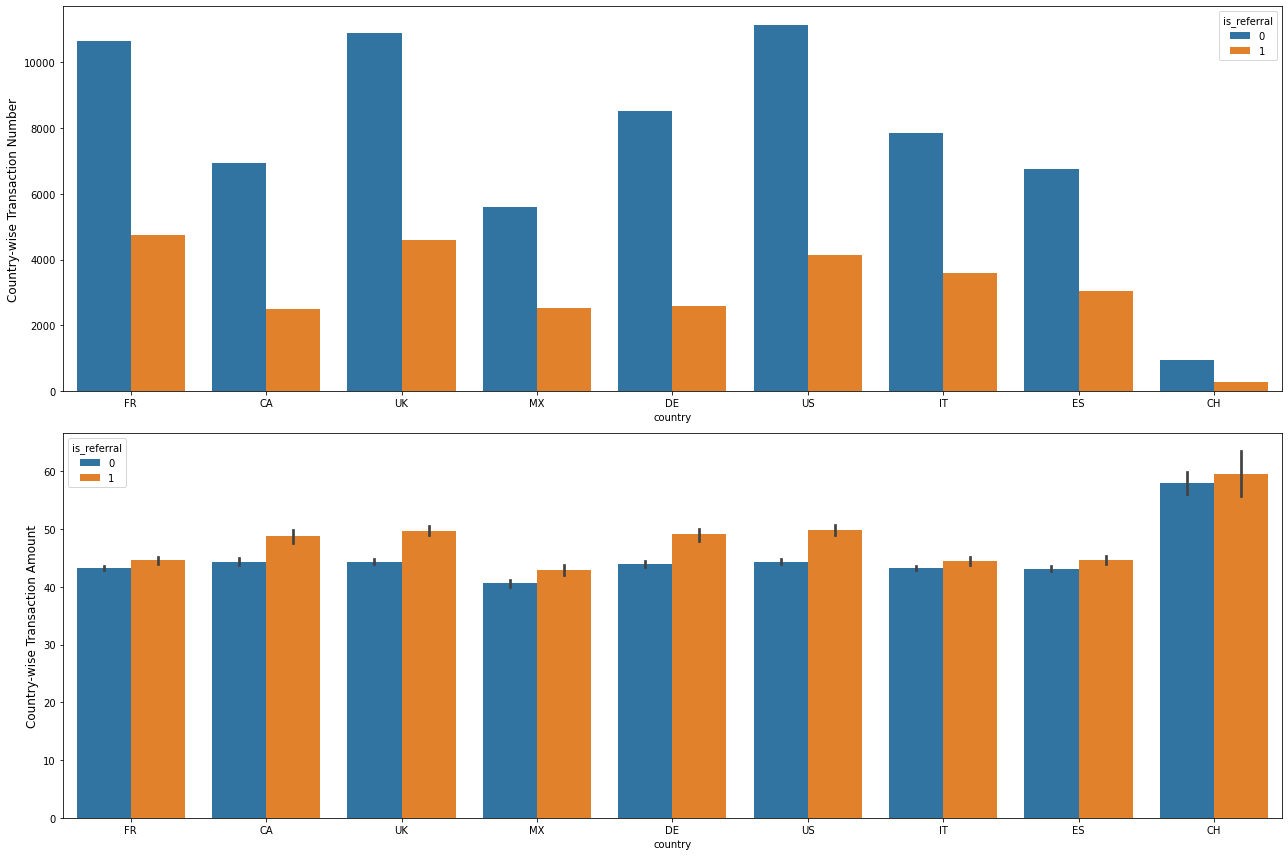

In [13]:
# referral spent visualization
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 12))
sns.countplot(x='country', hue='is_referral', data=data, ax=ax[0])
ax[0].set_ylabel('Country-wise Transaction Number', fontsize=12)

sns.barplot(x='country', y='money_spent', hue='is_referral', data=data, ax=ax[1])
ax[1].set_ylabel('Country-wise Transaction Amount', fontsize=12)
plt.tight_layout()
plt.show()

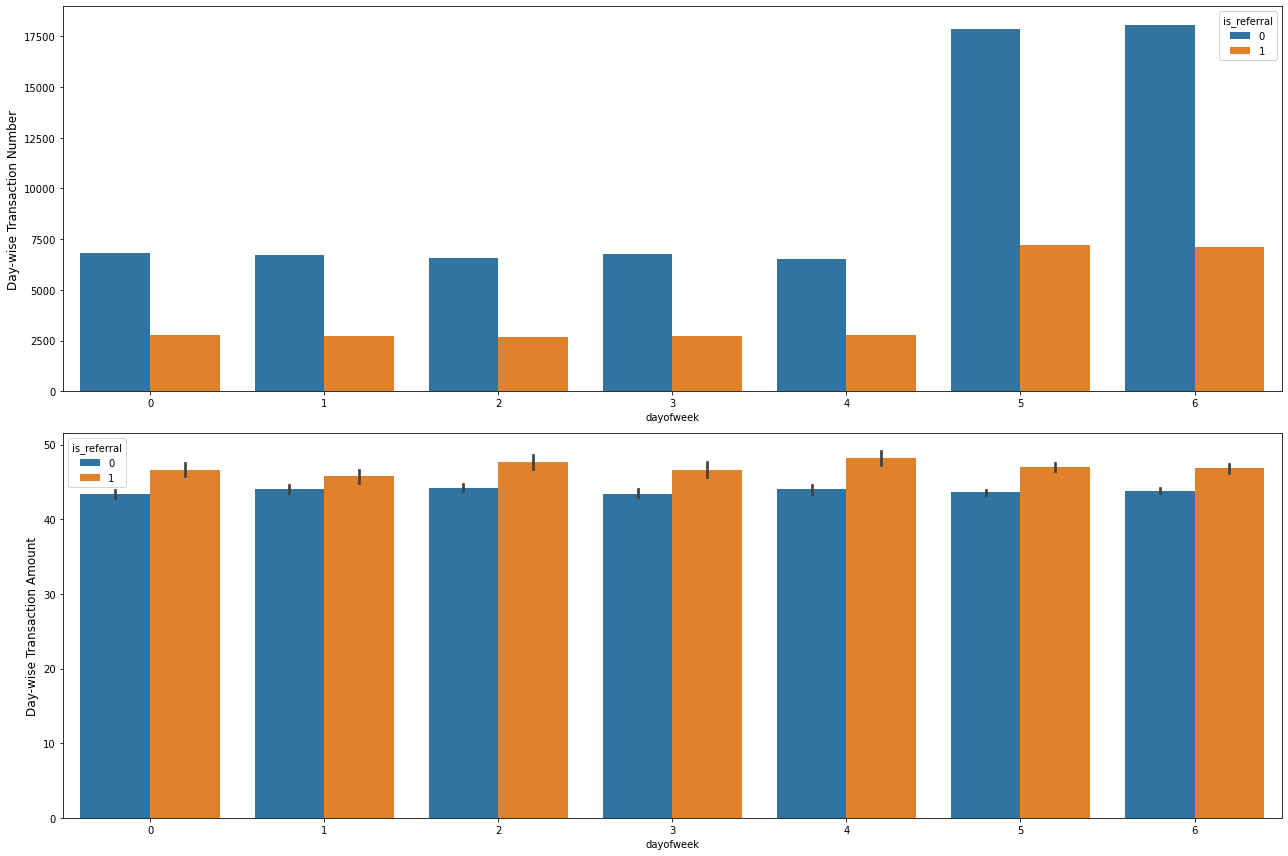

In [14]:
# day of week spent visualization (Monday is 0 and Sunday is 6)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 12))
sns.countplot(x='dayofweek', hue='is_referral', data=data, ax=ax[0])
ax[0].set_ylabel('Day-wise Transaction Number', fontsize=12)

sns.barplot(x='dayofweek', y='money_spent', hue='is_referral', data=data, ax=ax[1])
ax[1].set_ylabel('Day-wise Transaction Amount', fontsize=12)
plt.tight_layout()
plt.show()